In [228]:
#LSTM on Raw Data

import numpy 
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# fix random seed for reproducibility
numpy.random.seed(7)



In [182]:
PULoc = 4

In [183]:
dataframe = pandas.read_csv('Demand_Data3_2017_Total.csv', usecols=[4,3])
dataframe = dataframe[dataframe['PULocationID'] == PULoc]
dataframe = dataframe['passenger_count']
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset = numpy.reshape(dataset, (len(dataset),1))

In [184]:
#Test = pandas.read_csv('Demand_Data3_Test_Predictions_2017.csv', usecols=[4,3], engine='python', skipfooter=3)
#Test = Test[Test['PULocationID'] == 4]
#Test = Test['passenger_count']
#Test_Values = Test.values
#Test_Values = Test_Values.astype('float32')
#Test_Values = Test_Values[0:24*100]
#Test_Values = np.reshape(Test_Values, (len(Test_Values),1))

In [185]:
#Preprocessing Training
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)







In [186]:
#Training/Testing Data (Train on Jan-Oct, Ttest on Nov-Dec) 370472 is index
train_size = int(len(dataset) * 0.8333)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
#train_size = len(dataset)
#test_size = len(Test_Values)
#train = dataset
#test = Test_Values

In [187]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [188]:

# create and fit the LSTM network
model = Sequential()
#model.add(LSTM(1, input_shape=(1, look_back)))
model.add(LSTM(4))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=10, verbose=2)



Epoch 1/10
 - 3s - loss: 0.0268
Epoch 2/10
 - 1s - loss: 0.0101
Epoch 3/10
 - 1s - loss: 0.0093
Epoch 4/10
 - 1s - loss: 0.0093
Epoch 5/10
 - 1s - loss: 0.0093
Epoch 6/10
 - 1s - loss: 0.0093
Epoch 7/10
 - 1s - loss: 0.0093
Epoch 8/10
 - 1s - loss: 0.0093
Epoch 9/10
 - 1s - loss: 0.0093
Epoch 10/10
 - 1s - loss: 0.0093


In [189]:

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
 #invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))



Train Score: 104.17 RMSE
Test Score: 103.87 RMSE


In [190]:
print(testPredict)
print(trainPredict)

[[247.52072]
 [224.72218]
 [251.48834]
 ...
 [564.7017 ]
 [522.2195 ]
 [531.41516]]
[[649.7281 ]
 [692.77576]
 [853.5415 ]
 ...
 [492.0282 ]
 [481.93903]
 [420.46817]]


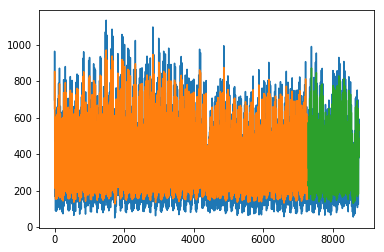

In [191]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

In [192]:
#LSTM on Residuals

In [211]:
dataframe = pandas.read_csv('Demand_Data3_2017_Total.csv', usecols=[4,3,15])
dataframe['Residuals'] = dataframe['passenger_count'] - dataframe['OLS_fitted_value']
print(dataframe)

        PULocationID  passenger_count  OLS_fitted_value   Residuals
0                  4              135        220.071280  -85.071280
1                 12                3        224.028070 -221.028070
2                 13              104        224.522669 -120.522669
3                 24               94        229.963255 -135.963255
4                 43              401        239.360631  161.639369
5                 45               54        240.349829 -186.349829
6                 48              697        241.833625  455.166375
7                 50              315        242.822822   72.177178
8                 68              664        251.725600  412.274400
9                 79             1076        257.166186  818.833814
10                87              150        261.122976 -111.122976
11                88               70        261.617574 -191.617574
12                90              470        262.606772  207.393228
13               100              100        267

In [212]:
dataframe = dataframe[dataframe['PULocationID'] == PULoc]
dataframe = dataframe['Residuals']
dataset = dataframe.values
dataset = dataset.astype('float32')
#dataset = dataset[0:24*100]
dataset = numpy.reshape(dataset, (len(dataset),1))

In [213]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset2 = dataset

In [214]:
#Training/Testing Data (Train on Jan-Oct, Ttest on Nov-Dec) 370472 is index
print(len(dataset))
train_size = int(len(dataset) * 0.8333)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
print(len(train))
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
#train_size = len(dataset)
#test_size = len(Test_Values)
#train = dataset
#test = Test_Values

8759
7298


In [215]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



7298
[[0.609821  ]
 [0.68862927]
 [0.95467937]
 ...
 [0.41143018]
 [0.49045014]
 [0.50288725]]
[0.68862927 0.95467937 0.9651578  ... 0.49045014 0.50288725 0.45222116]


In [216]:

# create and fit the LSTM network
model = Sequential()
#model.add(LSTM(1, input_shape=(1, look_back)))
model.add(LSTM(4))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=10, verbose=2)




Epoch 1/10
 - 3s - loss: 0.0293
Epoch 2/10
 - 1s - loss: 0.0104
Epoch 3/10
 - 1s - loss: 0.0081
Epoch 4/10
 - 1s - loss: 0.0075
Epoch 5/10
 - 1s - loss: 0.0074
Epoch 6/10
 - 1s - loss: 0.0074
Epoch 7/10
 - 1s - loss: 0.0074
Epoch 8/10
 - 1s - loss: 0.0074
Epoch 9/10
 - 1s - loss: 0.0074
Epoch 10/10
 - 1s - loss: 0.0074


In [217]:

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
 #invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))




Train Score: 81.37 RMSE
Test Score: 83.27 RMSE


[[[0.609821  ]]

 [[0.68862927]]

 [[0.95467937]]

 ...

 [[0.41143018]]

 [[0.49045014]]

 [[0.50288725]]]


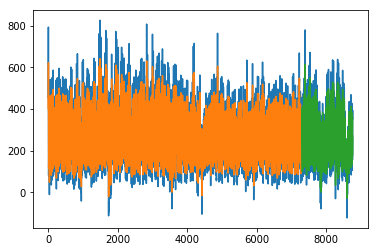

In [219]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

In [220]:
#Undo the Residuals

In [221]:
print(len(trainPredict))
print(len(testPredict))

7296
1459


In [222]:
dataframe = pandas.read_csv('Demand_Data3_2017_Total.csv', usecols=[4,3,15])
dataframe['Residuals'] = dataframe['passenger_count'] - dataframe['OLS_fitted_value']
dataframe = dataframe[dataframe['PULocationID'] == PULoc]
dataframe = dataframe['Residuals']
print(dataframe.values)

[455.1663753  529.9207638  782.2852665  ... 393.5290163  392.891366
 352.93202097]


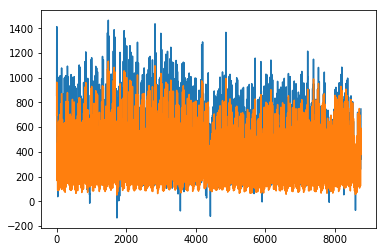

In [227]:

Predicted_Residuals = numpy.append(trainPredict,testPredict)
original = dataframe.values

Predicted = Predicted_Residuals  + original[:-4]
plt.plot(Predicted)

dataframe = pandas.read_csv('Demand_Data3_2017_Total.csv', usecols=[4,3,15])
dataframe = dataframe[dataframe['PULocationID'] == PULoc]
dataframe = dataframe['passenger_count']
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset = numpy.reshape(dataset, (len(dataset),1))
plt.plot(dataset)

[405.6424  463.18777 650.94135 ... 188.65822 268.19272 268.34552]
